In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms as A
import matplotlib.pyplot as plt
from torch.autograd import Variable
from tqdm.notebook import tqdm
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
train_transforms = A.Compose(
    [   A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
        A.ToTensor(),   
    ]
)


In [ ]:
!pwd

/content


In [ ]:
train_path="/content/drive/MyDrive/ML/Soce_week2/train"
val_path="/content/drive/MyDrive/ML/Soce_week2/val"
test_path="/content/drive/MyDrive/ML/Soce_week2/test"

In [ ]:
train_loader=DataLoader(torchvision.datasets.ImageFolder(train_path,transform=A.Compose([A.ToTensor(),A.Resize((150,150))])),batch_size=4,shuffle=True,drop_last=True)

In [ ]:
test_loader=DataLoader(torchvision.datasets.ImageFolder(test_path,transform=A.Compose([A.ToTensor(),A.Resize((150,150))])),batch_size=4,shuffle=True,drop_last=True)
val_loader=DataLoader(torchvision.datasets.ImageFolder(val_path,transform=A.Compose([A.ToTensor(),A.Resize((150,150))])),batch_size=4,shuffle=True,drop_last=True)

In [ ]:
len(train_loader),len(val_loader),len(test_loader)

828

In [ ]:
enx=enumerate(train_loader)
enx

tensor(51)


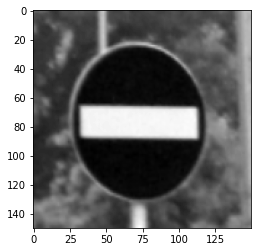

In [ ]:
c,(img,label)=next(iter(enx))

%matplotlib inline
plt.imshow(img[0][1],cmap="gray")
print(label[0])

In [ ]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten=nn.Flatten()
        self.ln1=nn.Linear(in_features=3*150*150,out_features=512)
        self.b1=nn.BatchNorm1d(512)
        self.ln2=nn.Linear(in_features=512, out_features=128)
        self.b2=nn.BatchNorm1d(128)
        self.ln3=nn.Linear(in_features=128,out_features=64)
        self.b3=nn.BatchNorm1d(64)
        self.ln4=nn.Linear(in_features=64,out_features=58)
    def forward(self,x):
        x=self.flatten(x)
        x=self.ln1(x)
        x=self.b1(x)
        x=nn.functional.relu(x)
        x=self.ln2(x)
        x=self.b2(x)
        x=nn.functional.relu(x)
        x=self.ln3(x)
        x=self.b3(x)
        x=nn.functional.relu(x)
        x=self.ln4(x)
        x=nn.functional.relu(x)
        return x

In [ ]:
# model=ANN().to(device)

In [ ]:
# criterion = nn.NLLLoss().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:

#MODEL
model=ANN().to(device)

#OPTIMIZER AND LOSS
criterion = nn.NLLLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,momentum=0.9)



for epoch in range(100):
    train_loss=0
    val_loss=0
    for i,(val_img,val_lbl) in tqdm(enumerate(val_loader)):
            val_img=val_img.to(device)
            val_lbl=val_lbl.to(device)
            val_output=model(val_img)
            val_output=nn.functional.log_softmax(val_output,dim=1)
#             val_lbl=nn.functional.one_hot(val_lbl,58)
            val_los=criterion(val_output,val_lbl)
            val_loss+=val_los.item()
    for i,(image,labels) in tqdm(enumerate(train_loader)):
        images=image.to(device)
        labels=labels.to(device)
        optimizer.zero_grad()
        output=model(images)
        output=nn.functional.log_softmax(output,dim=1)
#         label=nn.functional.one_hot(labels,58)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        train_loss+=loss.item()
    print(f"Epoch : {epoch} Training Loss : {train_loss} Validation Loss : {val_loss}")

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 0 Training Loss : 2771.153203010559 Validation Loss : 450.54035568237305


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 1 Training Loss : 2327.908403992653 Validation Loss : 337.7577761411667


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 2 Training Loss : 2065.5606883466244 Validation Loss : 309.2809462547302


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 3 Training Loss : 1912.0942579507828 Validation Loss : 276.18820983171463


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 4 Training Loss : 1739.6398045867682 Validation Loss : 265.66339135169983


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 5 Training Loss : 1609.0936318188906 Validation Loss : 237.3298700749874


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 6 Training Loss : 1511.5721703469753 Validation Loss : 226.20368093252182


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 7 Training Loss : 1421.8965289108455 Validation Loss : 213.38430333137512


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 8 Training Loss : 1370.3932161331177 Validation Loss : 204.53029818832874


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 9 Training Loss : 1275.8657437041402 Validation Loss : 202.78553639352322


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 10 Training Loss : 1260.8123543486 Validation Loss : 191.72821831703186


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 11 Training Loss : 1168.9861372113228 Validation Loss : 194.92941273748875


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 12 Training Loss : 1126.992432443425 Validation Loss : 176.1399889588356


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 13 Training Loss : 1084.2744316058233 Validation Loss : 173.08974885940552


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 14 Training Loss : 1054.8003951562569 Validation Loss : 170.47736935131252


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 15 Training Loss : 1003.0294972164556 Validation Loss : 165.68067740276456


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 16 Training Loss : 981.7671300545335 Validation Loss : 145.05971755925566


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 17 Training Loss : 1004.6868128827773 Validation Loss : 163.33558415807784


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 18 Training Loss : 946.3317589531653 Validation Loss : 150.05369428917766


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 19 Training Loss : 936.7881023385562 Validation Loss : 150.59259314835072


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 20 Training Loss : 879.0036893405486 Validation Loss : 165.41480621509254


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 21 Training Loss : 884.5422544949688 Validation Loss : 151.6895487755537


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 22 Training Loss : 852.5156335071661 Validation Loss : 150.98991572577506


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 23 Training Loss : 813.853353731567 Validation Loss : 150.44900090713054


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 24 Training Loss : 827.7241151542403 Validation Loss : 145.6450556255877


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 25 Training Loss : 769.8451543580741 Validation Loss : 140.22806016681716


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 26 Training Loss : 814.6628026464023 Validation Loss : 150.34605107083917


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 27 Training Loss : 807.6662164372392 Validation Loss : 132.0576359666884


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 28 Training Loss : 761.7547547621652 Validation Loss : 140.73325769416988


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 29 Training Loss : 761.2430174970068 Validation Loss : 146.2740707648918


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 30 Training Loss : 746.4332689540461 Validation Loss : 133.66427616775036


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 31 Training Loss : 721.6055631621275 Validation Loss : 132.29899299889803


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 32 Training Loss : 756.3978738137521 Validation Loss : 132.80894682649523


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 33 Training Loss : 744.8585881048348 Validation Loss : 137.7987032290548


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 34 Training Loss : 725.8202157636406 Validation Loss : 139.83365011494607


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 35 Training Loss : 686.8625298677944 Validation Loss : 134.83156491606496


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 36 Training Loss : 684.1287272019545 Validation Loss : 139.04339449247345


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 37 Training Loss : 679.0404315933265 Validation Loss : 121.62248181924224


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 38 Training Loss : 690.8254287226591 Validation Loss : 119.2597762113437


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 39 Training Loss : 669.5679158717976 Validation Loss : 111.19676665961742


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 40 Training Loss : 695.5099111287855 Validation Loss : 127.48017909750342


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 41 Training Loss : 648.6022439060034 Validation Loss : 128.49193035252392


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 42 Training Loss : 635.0574783210759 Validation Loss : 104.01849670801312


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 43 Training Loss : 642.836102227564 Validation Loss : 124.88379490678199


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 44 Training Loss : 649.5330859236419 Validation Loss : 125.51512470562011


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 45 Training Loss : 627.0024315435439 Validation Loss : 120.50442307686899


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 46 Training Loss : 584.4002942812513 Validation Loss : 109.82905294583179


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 47 Training Loss : 538.1714496792993 Validation Loss : 115.92444691131823


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 48 Training Loss : 581.3248141927761 Validation Loss : 113.43717883108184


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 49 Training Loss : 586.7824792148895 Validation Loss : 109.94846346555278


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 50 Training Loss : 545.4260798777977 Validation Loss : 117.26913690986112


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 51 Training Loss : 622.336939259374 Validation Loss : 121.61512455227785


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 52 Training Loss : 568.571355362772 Validation Loss : 128.07822816167027


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 53 Training Loss : 569.9876361488714 Validation Loss : 119.33667715545744


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 54 Training Loss : 561.7749743353343 Validation Loss : 97.7079613484675


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 55 Training Loss : 531.8132845673827 Validation Loss : 96.01866683643311


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 56 Training Loss : 555.5623415821174 Validation Loss : 101.52617399673909


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 57 Training Loss : 523.1820252583711 Validation Loss : 106.13979158643633


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 58 Training Loss : 544.3563507914369 Validation Loss : 120.25891233509174


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 59 Training Loss : 528.4823035565205 Validation Loss : 116.35304949339479


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 60 Training Loss : 531.5007737037959 Validation Loss : 104.28900125264772


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 61 Training Loss : 524.9050905613985 Validation Loss : 106.12198438681662


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 62 Training Loss : 517.0606670278939 Validation Loss : 108.08229731325991


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 63 Training Loss : 492.87372568848514 Validation Loss : 105.27067549433559


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 64 Training Loss : 528.0340407879412 Validation Loss : 102.0891045439057


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 65 Training Loss : 511.5159158567112 Validation Loss : 105.5182406558888


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 66 Training Loss : 507.8508014898107 Validation Loss : 99.05349648749689


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 67 Training Loss : 515.8345870489138 Validation Loss : 106.58259793723118


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 68 Training Loss : 477.98873860131425 Validation Loss : 101.54486689175246


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 69 Training Loss : 489.0106972270878 Validation Loss : 100.4569678719854


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 70 Training Loss : 486.49442035440006 Validation Loss : 106.89469254110008


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 71 Training Loss : 471.57500672497554 Validation Loss : 118.92908333294326


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 72 Training Loss : 471.8051770919701 Validation Loss : 107.83174638170749


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 73 Training Loss : 454.3229209238634 Validation Loss : 99.67453062883578


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 74 Training Loss : 496.16276520027895 Validation Loss : 99.11630222108215


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 75 Training Loss : 491.1723989048769 Validation Loss : 94.02268377113796


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 76 Training Loss : 473.2251967252523 Validation Loss : 102.64883930131327


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 77 Training Loss : 496.0446802244405 Validation Loss : 107.41985522140749


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 78 Training Loss : 488.7906570560008 Validation Loss : 108.50485386251239


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 79 Training Loss : 470.0803359464626 Validation Loss : 99.18399055008194


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 80 Training Loss : 449.03454187219904 Validation Loss : 111.44471689872444


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 81 Training Loss : 465.5734043048724 Validation Loss : 113.69579111516941


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 82 Training Loss : 469.0946537175623 Validation Loss : 99.48529593134299


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 83 Training Loss : 468.168566364664 Validation Loss : 109.38609476131387


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 84 Training Loss : 458.71621350997884 Validation Loss : 120.11489543691278


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 85 Training Loss : 454.01367799637956 Validation Loss : 97.64076721656602


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 86 Training Loss : 456.6554784977343 Validation Loss : 105.6812969557941


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 87 Training Loss : 477.0466343807784 Validation Loss : 96.72537657542853


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 88 Training Loss : 440.95579550525144 Validation Loss : 104.60498815092433


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 89 Training Loss : 470.28542352792283 Validation Loss : 102.41354435244284


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 90 Training Loss : 460.49005943883094 Validation Loss : 93.51441230508499


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 91 Training Loss : 461.1325593990914 Validation Loss : 92.37543972628191


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 92 Training Loss : 419.30378872173605 Validation Loss : 92.19974551847554


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 93 Training Loss : 453.37871277063095 Validation Loss : 101.27216160504031


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 94 Training Loss : 441.14250618655933 Validation Loss : 94.11083684349433


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 95 Training Loss : 418.14711153975804 Validation Loss : 92.53554043629265


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 96 Training Loss : 437.6714776956942 Validation Loss : 82.54744775348809


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 97 Training Loss : 412.44920017376717 Validation Loss : 93.00218135426985


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 98 Training Loss : 417.1673007089921 Validation Loss : 97.68161278712796


0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch : 99 Training Loss : 431.43439958563977 Validation Loss : 95.79517997824587


In [ ]:
total_train=0
total_test=0
total_val=0
dirs_test=glob.glob("/content/drive/MyDrive/ML/Soce_week2/test/*")
dirs_train=glob.glob("/content/drive/MyDrive/ML/Soce_week2/train/*")
dirs_val=glob.glob("/content/drive/MyDrive/ML/Soce_week2/val/*")
for dirs in dirs_train:
    files=glob.glob(dirs+'/*.png')
    total_train+=len(files)
for dirs in dirs_val:
    files=glob.glob(dirs+'/*.png')
    total_val+=len(files)
for dirs in dirs_test:
    files=glob.glob(dirs+'/*.png')
    total_test+=len(files)
print(total_train,total_val,total_test)

3313 440 422


In [ ]:
train_pred=0
val_pred=0
test_pred=0
for i,(images,labels) in enumerate(train_loader):
    images=images.to(device)
    labels=labels.to(device)
    output=model(images)
    output=nn.functional.softmax(output)
    output=torch.argmax(output,dim=1)
    train_pred+=(output==labels).sum()
for i,(images,labels) in enumerate(val_loader):
    images=images.to(device)
    labels=labels.to(device)
    output=model(images)
    output=nn.functional.softmax(output)
    output=torch.argmax(output,dim=1)
    val_pred+=(output==labels).sum()
for i,(images,labels) in enumerate(test_loader):
    images=images.to(device)
    labels=labels.to(device)
    output1=model(images)
    output1=nn.functional.softmax(output1)
    output1=torch.argmax(output1,dim=1)
    test_pred+=(output1==labels).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
train_pred/total_train,val_pred/total_val,test_pred/total_test
print(f"Training Accuracy   : {train_pred/total_train}")
print(f"Validation Accuracy : {val_pred/total_val}")
print(f"Testing Accuracy    : {test_pred/total_test}")

Training Accuracy   : 0.8711138367652893
Validation Accuracy : 0.7999999523162842
Testing Accuracy    : 0.829383909702301
